In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

df = pd.read_csv("../input/odtu-datathon-22/data.set.csv", encoding="latin5", delimiter=";")

#### SORU 1: Verilen veri setini minimum kayıpla üzerinde çalışılabilir bir formata getirin. Bu doğrultuda yaptığınız operasyonları açıklayın. 

In [2]:
df.head()

,Sütun1,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,eğitim,okuma_yazma_bilmeyen
0,2612,2612.0,275000,4.0,120.0,12.0,Kombi,Uygun,Kot 1,1.0,Çankaya,925828.0,Lisans,"0,7"
1,4819,4819.0,700000,3.0,88.0,0.0,Merkezi(PayÖlçer),Uygun,1. Kat,1.0,Çankaya,925828.0,Lisans,"0,7"
2,149,149.0,980000,5.0,230.0,30.0,Kombi,Uygun,3. Kat,2.0,Çankaya,925828.0,liSans,"0,7"
3,3628,3628.0,385000,4.0,120.0,22.0,Kombi,Uygun,2. Kat,1.0,Keçiören,938565.0,Lise,"1,43"
4,3936,3936.0,700000,5.0,150.0,0.0,Kombi,Uygun,Ara Kat,2.0,Çankaya,925828.0,Lisans,"0,7"


In [3]:
# The dtype of id is float and there are two nan values in id column. So I will drop that column and use "Sütun1" as "id" column.
# Because its dtype is int and doesn't include nan value.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222 entries, 0 to 4221
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sütun1                4222 non-null   int64  
 1   id                    4220 non-null   float64
 2   fiyat                 4212 non-null   object 
 3   oda_salon_sayisi      4213 non-null   float64
 4   net_m2                4213 non-null   float64
 5   bina_yasi             4216 non-null   float64
 6   isinma_tipi           4218 non-null   object 
 7   krediye_uygunluk      4218 non-null   object 
 8   bulundugu_kat         4218 non-null   object 
 9   banyo_sayisi          4214 non-null   float64
 10  ilce                  4215 non-null   object 
 11  nüfus                 4214 non-null   float64
 12  eğitim                4217 non-null   object 
 13  okuma_yazma_bilmeyen  4217 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory usage: 461.9+ KB


In [4]:
# id column is dropped and the name of "Sütun1" column is change to "id".
df = df.drop(labels=["id"], axis=1)
column_ls = list(df.columns)
column_ls
column_ls[0] = "id"
df.columns = column_ls
df.head()

,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,eğitim,okuma_yazma_bilmeyen
0,2612,275000,4.0,120.0,12.0,Kombi,Uygun,Kot 1,1.0,Çankaya,925828.0,Lisans,"0,7"
1,4819,700000,3.0,88.0,0.0,Merkezi(PayÖlçer),Uygun,1. Kat,1.0,Çankaya,925828.0,Lisans,"0,7"
2,149,980000,5.0,230.0,30.0,Kombi,Uygun,3. Kat,2.0,Çankaya,925828.0,liSans,"0,7"
3,3628,385000,4.0,120.0,22.0,Kombi,Uygun,2. Kat,1.0,Keçiören,938565.0,Lise,"1,43"
4,3936,700000,5.0,150.0,0.0,Kombi,Uygun,Ara Kat,2.0,Çankaya,925828.0,Lisans,"0,7"


## Deal with duplicated values

In [5]:
# There are duplicated values. Some of them are more informative, i.e. includes more knowledge. So I will drop the less informative ones.
df["id"].value_counts()

396     2
2603    2
2671    2
4815    2
3977    2
       ..
2854    1
425     1
4693    1
543     1
762     1
Name: id, Length: 3965, dtype: int64

In [6]:
# For example, the second one includes a nan values whereas the first one doesn't. So it would be better to drop the second row. 
df[df["id"] == 2603]

,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,eğitim,okuma_yazma_bilmeyen
847,2603,595000,4.0,98.0,24.0,Merkezi,Uygun,4. Kat,1.0,Keçiören,938565.0,Lise,"1,43"
3634,2603,595000,4.0,NaN,24.0,Merkezi,Uygun,4. Kat,1.0,Keçiören,938565.0,Lise,"1,43"


In [7]:
# Additionally, there can be bad formatting in fiyat column like the following.
df[df["id"] == 3342]

,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,eğitim,okuma_yazma_bilmeyen
1491,3342,725000,2.0,62.0,1.0,Merkezi,Uygun,19. Kat,1.0,Çankaya,925828.0,Lisans,"0,7"
3949,3342,"7,25E+05",2.0,62.0,1.0,Merkezi,Uygun,19. Kat,1.0,Çankaya,925828.0,Lisans,"0,7"


In [8]:
# The following ids are the duplicated id numbers. Let us investigate them.
np.set_printoptions(threshold=np.inf)
duplicated_ids = df["id"].value_counts()[df["id"].value_counts() != 1].index.values
print(duplicated_ids)
np.set_printoptions(threshold=5)

[ 396 2603 2671 4815 3977 4773 4448 4229 2620 1385 3942 2606 3520 1011
 1030 3199  404 3364 3543 2264  394  973 3538 4641  681 1746  769 2829
  595 1469  142 4940 3923 2339 4950 1123  503 1845 3469 3018  285 3069
 4832 4157 2634 3241 2568  741 1539 1642  351 1282 3956 2873 2221 4865
  114 3441 3002 1953 2163 3231 2629  405 4433  261 1278 3618 2762 1594
 1320 2102 3983 2246 1650 4533  138  866 4208 1592 4636 1668 1976 1023
 3074 4676 1989 1589 2647 4755 2028  357 3757 2314 3395 4482  495  635
 1804 1144 4699 4912  721 2430 4191 4283 3982 4490 1168  744 1528 3342
 1791 1608 1446 1961  615 3948 1936 3980  999 2948 3407 4936  627 4218
 3361 3946 1584  433   24 3076   35  316 3566  777 2311 4092 2995 4480
 1154 1963  941 2982  938 2925 1163 2139 1987  470 4082 3006 4451 4309
 3107 2267 1731 4665   19 4638 2331 3666 2642  154 2985 3711 1884 1702
 2644 2684 2901 1172 4525 2990 3287  853  828 4894 3128 1505 4014 4926
  224  655 3153  304 4241 3059 1942  667 4452 1684 1641  844 1739 3175
 4314 

In [9]:
# The following ids are the duplicated ids and one of them includes nan values.
# or one of them includes bad formatting like 9,50E+05 instead of 950000.
def duplicated_id_printer():
    for i in duplicated_ids:
        sub_df = df[df["id"] == i].drop_duplicates()
        if len(sub_df) == 2:
            # if len == 2 then they are not identical. if len == 1, they were identical, but one of them is dropped with .drop_duplicates() method.
            # So the non-identical ones is printed. Note that their ids are identical.
            print(i)
duplicated_id_printer()

2603
4773
4448
3520
1011
404
142
1642
1282
2221
114
357
4482
3982
1528
3342
2311
2139
4451
4309
828
4926
224
4314
4217
3293
1482


In [10]:
# So, now I will fix the data type and format of the "fiyat" column.
# fiyat column is change to float64 from object.
df["fiyat"] = df["fiyat"].replace(to_replace=",", value=".", regex=True).astype("float64")
df["okuma_yazma_bilmeyen"] = df["okuma_yazma_bilmeyen"].replace(to_replace=",", value=".", regex=True).astype("float64")

In [11]:
# Now we got only nan-included duplicated rows after the correction of the formatting and data type of "fiyat column".
print("These are the ids including nan values of duplicated rows.")
duplicated_id_printer()
print("\nThese are the indexes including nan values of duplicated rows.")
# let us drop these them.
for i in [2603, 4773, 4448, 3520, 357, 828, 224]:
    temp_s = pd.isnull(df[df["id"] == i]).sum(axis=1)
    the_index = temp_s[temp_s == 1].index.values[0]
    print(the_index)
    df.drop(the_index, inplace=True)

These are the ids including nan values of duplicated rows.
2603
4773
4448
3520
357
828
224

These are the indexes including nan values of duplicated rows.
3634
2161
1813
4204
2589
1457
3633


In [12]:
# Let us check. After the formatting of string columns, I will drop the remaining duplicated columns.
df[df["id"] == 2603]

,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,eğitim,okuma_yazma_bilmeyen
847,2603,595000.0,4.0,98.0,24.0,Merkezi,Uygun,4. Kat,1.0,Keçiören,938565.0,Lise,1.43


In [13]:
# Every distinct has a unique education level. So we can fill some of the nan values(nüfus, eğitim) by using the distinct names.
print("Before formatting 'eğitim' and 'nüfus' column")
for i in df["ilce"].unique():
    print(str(i)+":", ", ".join( str(i) for i in list(set(df[df["ilce"] == i]["eğitim"])) if not pd.isnull(i)))
print("------------")
for i in df["ilce"].unique():
    print(str(i)+":", ", ".join( str(i) for i in list(set(df[df["ilce"] == i]["nüfus"])) if not pd.isnull(i)))

# cankaya becomes çankaya in the following series and ilce column data type is maden category.
df["ilce"] = df["ilce"].str.lower().replace("(c)ank", "çank", regex=True).astype("category")
# lis3 becomees lise in eğitim column.
df["eğitim"] = df["eğitim"].str.lower().replace("lis3", "lise").astype("category")
print("###########")
print("After formatting 'eğitim' and 'nüfus' column")
for i in df["ilce"].unique():
    print(str(i)+":", ", ".join( str(i) for i in list(set(df[df["ilce"] == i]["eğitim"])) if not pd.isnull(i)))
print("------------")
for i in df["ilce"].unique():
    print(str(i)+":", ", ".join( str(i) for i in list(set(df[df["ilce"] == i]["nüfus"])) if not pd.isnull(i)))

print("------------")
print("The illeteracy rate")
for i in df["ilce"].unique():
    print(str(i)+":", ", ".join( str(i) for i in list(set(df[df["ilce"] == i]["okuma_yazma_bilmeyen"])) if not pd.isnull(i)))

Before formatting 'eğitim' and 'nüfus' column
Çankaya: Lisans, liSans
Keçiören: Lise, liS3
Sincan: Lise, liS3
Mamak: Lise
cankaya: Lisans
nan: 
------------
Çankaya: 925828.0
Keçiören: 938565.0
Sincan: 549108.0
Mamak: 669465.0
cankaya: 925828.0
nan: 
###########
After formatting 'eğitim' and 'nüfus' column
çankaya: lisans
keçiören: lise
sincan: lise
mamak: lise
nan: 
------------
çankaya: 925828.0
keçiören: 938565.0
sincan: 549108.0
mamak: 669465.0
nan: 
------------
The illeteracy rate
çankaya: 0.7, 0.0
keçiören: 0.0, 1.43
sincan: 0.0, 1.44
mamak: 1.9
nan: 


In [14]:
# Nan values of "nüfus" and "eğitim", "ilce" and "okuma_yazma_bilmeyen" columns are filled.
educ_dict = {"çankaya": "lisans", "keçiören": "lise", "sincan": "lise", "mamak": "lise"}
cons_dict = {"çankaya": 925828.0, "keçiören": 938565.0, "sincan": 549108.0, "mamak": 669465.0}
cons2_dict = {925828.0: 'çankaya', 938565.0: 'keçiören', 549108.0: 'sincan', 669465.0: 'mamak'}

def nan_filler(row, target_col_name, base_col_name, d):
    if pd.isnull(row[target_col_name]):
        row[target_col_name] = d[row[base_col_name]]
    return row

df = df.apply(func=nan_filler, args=("nüfus", "ilce", cons_dict) ,axis=1)
df = df.apply(func=nan_filler, args=("eğitim", "ilce", educ_dict) ,axis=1)
df = df.apply(func=nan_filler, args=("ilce", "nüfus", cons2_dict) ,axis=1)
df.head()

,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,eğitim,okuma_yazma_bilmeyen
0,2612,275000.0,4.0,120.0,12.0,Kombi,Uygun,Kot 1,1.0,çankaya,925828.0,lisans,0.70
1,4819,700000.0,3.0,88.0,0.0,Merkezi(PayÖlçer),Uygun,1. Kat,1.0,çankaya,925828.0,lisans,0.70
2,149,980000.0,5.0,230.0,30.0,Kombi,Uygun,3. Kat,2.0,çankaya,925828.0,lisans,0.70
3,3628,385000.0,4.0,120.0,22.0,Kombi,Uygun,2. Kat,1.0,keçiören,938565.0,lise,1.43
4,3936,700000.0,5.0,150.0,0.0,Kombi,Uygun,Ara Kat,2.0,çankaya,925828.0,lisans,0.70


In [15]:
# We have to fill these values of "okuma_yazma_bilmeyen" column because the illeteracy rate of a specific distict 
# should be same but these are filled with 0 instead of the following values.
illetracy_dict = {"çankaya": 0.70, "keçiören": 1.43, "sincan": 1.44, "mamak": 1.90}

# First let us fill the nan values in "okuma_yazma_bilmeyen" column
df = df.apply(func=nan_filler, args=("okuma_yazma_bilmeyen", "ilce", illetracy_dict), axis=1)

# Then let us continue with zeros. 
df[df["okuma_yazma_bilmeyen"] == 0].head()

,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,eğitim,okuma_yazma_bilmeyen
25,4898,4250000.0,5.0,280.0,30.0,Merkezi,Uygun,4. Kat,4.0,keçiören,938565.0,lise,0.0
409,2389,780000.0,4.0,90.0,5.0,Kombi,Uygun,Yüksek Giriş,1.0,keçiören,938565.0,lise,0.0
503,3591,575000.0,5.0,155.0,14.0,Kombi,Uygun,3. Kat,2.0,çankaya,925828.0,lisans,0.0
587,3319,260000.0,4.0,110.0,27.0,Kombi,Uygun,Kot 1,1.0,keçiören,938565.0,lise,0.0
604,3454,695000.0,7.0,NaN,25.0,Kombi,Uygun,3. Kat,2.0,çankaya,925828.0,lisans,0.0


In [16]:
def zero_filler(row, target_col_name, base_col_name, d):
    if row[target_col_name] == 0:
        row[target_col_name] = d[row[base_col_name]]
    return row
df = df.apply(func=zero_filler, args=("okuma_yazma_bilmeyen", "ilce", illetracy_dict), axis=1)

In [17]:
# Now we are ready to drop duplicated rows after the formatting and filling.
df = df.drop_duplicates()

In [18]:
# Finally, the nan values are dropped. 
df = df.dropna()

#### SORU 2: Verilen veri seti üzerinden iki tane sayısal veri belirleyin ve bu değişkenler arasındaki ilişkiyi inceleyin. İncelerken kullandığınız yöntemleri ve yorumları açıklayın. 

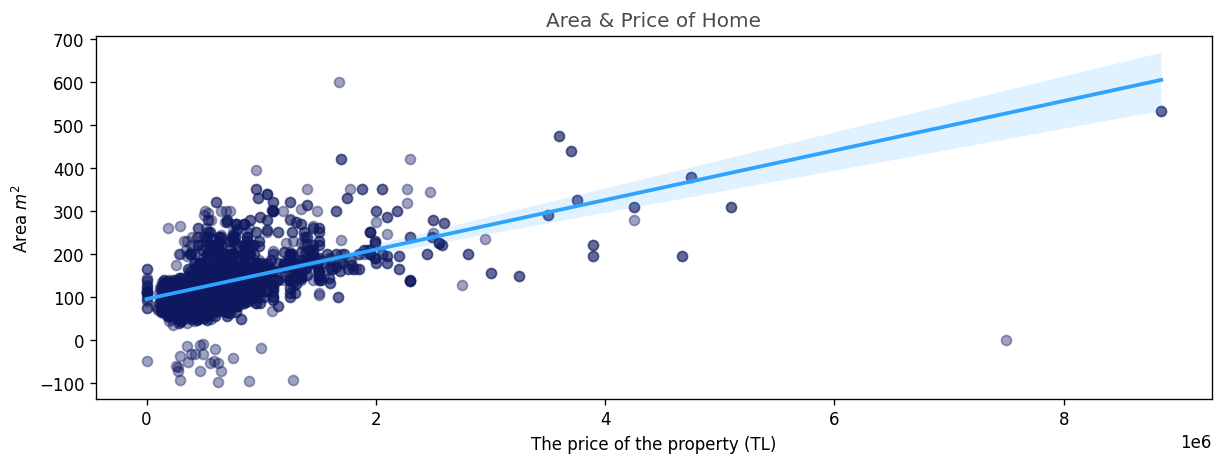

In [19]:
# Let us inverstigate the relationship between "fiyat" and "net_m2" by using seaborn library and pearsonr correlation function.
fiyat = df["fiyat"]
m2 = df["net_m2"]
fig, ax = plt.subplots(figsize=(12,4), dpi=120)
sns.regplot(x="fiyat", y="net_m2", data=df, ax=ax, 
            scatter_kws={"alpha": 0.4, "color":"#0E185F"}, 
            line_kws={"color": "#2FA4FF"}
)
ax.set_title("Area & Price of Home", alpha=0.7)
ax.set_xlabel("The price of the property (TL)")
ax.set_ylabel("Area $m^2$")
plt.show()

In [20]:
r, p_value = pearsonr(df["fiyat"], df["net_m2"])
print(f"The pearson correleation coefficient is {r}. We can say that area and the price of a house are moderately correlated.")

The pearson correleation coefficient is 0.5868398936757913. We can say that area and the price of a house are moderately correlated.


#### SORU 3: Verilen ilçelere göre kaç tane merkezi ısınmaya sahip 2.kat ve üzeri katlarda bulunan evler vardır? Grafik üzerinde gösteriniz. Grafiğinizi oluştururken yaptığınız operasyonları açıklayın.

In [21]:
# Let us make ordered categorical data type for "bulundugu_kat" column.
ls = ['Kot 3', 'Kot 2', 'Kot 1', 'Bodrum', 'Zemin', 'Giriş Katı', 'Ara Kat', 'Bahçe Katı', 'Yüksek Giriş', '1. Kat', '2. Kat', 
      '3. Kat', '4. Kat', 'Villa Katı', '5. Kat', '6. Kat', '7. Kat', '8. Kat', '9. Kat', '10. Kat', '11. Kat', '12. Kat', 
      '13. Kat', '14. Kat', '15. Kat', '16. Kat', '17. Kat', '18. Kat', '19. Kat', '20. Kat', '21 ve üzeri', 'Çatı Katı', 
      'En Üst Kat', 'Teras Katı']

df["bulundugu_kat"] = df["bulundugu_kat"].astype(pd.CategoricalDtype(ls, ordered=True))

In [22]:
merkezi_df = df[(df["bulundugu_kat"] >= "2. Kat") & ( df["isinma_tipi"].str.contains("Merkezi") )]
merkezi_df.head()

,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,eğitim,okuma_yazma_bilmeyen
8,3313,1250000.0,5.0,195.0,0.0,Merkezi(PayÖlçer),Uygun,4. Kat,2.0,keçiören,938565.0,lise,1.43
18,2053,850000.0,3.0,110.0,3.0,Merkezi(PayÖlçer),Uygun,7. Kat,2.0,keçiören,938565.0,lise,1.43
19,2125,739000.0,5.0,150.0,22.0,Merkezi,Uygun,2. Kat,2.0,çankaya,925828.0,lisans,0.70
22,1041,1875000.0,6.0,350.0,7.0,Merkezi(PayÖlçer),Uygun,21 ve üzeri,2.0,çankaya,925828.0,lisans,0.70
23,4595,710000.0,4.0,110.0,40.0,Merkezi,Uygun,2. Kat,1.0,keçiören,938565.0,lise,1.43


In [23]:
df_for_hist = merkezi_df.groupby("ilce").agg({"id": "count"}).reset_index()
df_for_hist

,ilce,id
0,keçiören,314
1,mamak,1
2,sincan,74
3,çankaya,320


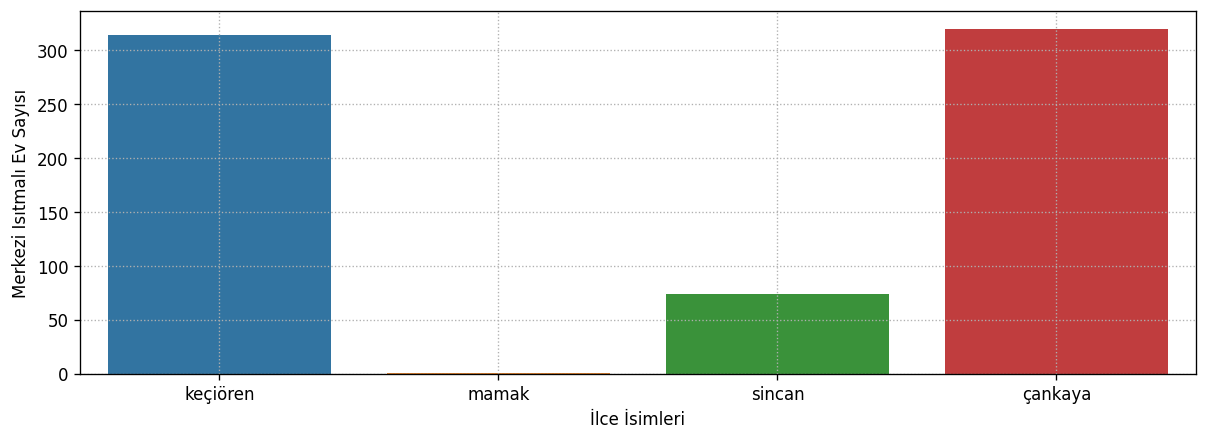

In [24]:
fig, ax = plt.subplots(figsize=(12,4), dpi=120)
sns.barplot(x="ilce", y="id", data=df_for_hist, ax=ax)
ax.grid(linestyle="dotted")
ax.set_xlabel("İlce İsimleri")
ax.set_ylabel("Merkezi Isıtmalı Ev Sayısı")
plt.show()
# Interestingly, there is only 1 house in mamak with Merkezi heating. 

#### SORU 4: Eğitim düzeyi lisans olanların oranının yüksek olduğu ve fiyatı 5000’den az olan bir evde oturmak isteyen biri hangi ilçedeki evlere bakmalıdır? Grafik çıkartarak, çıkarımlarınızı yazılı olarak ifade edin ve grafiğinizi oluştururken yaptığınız operasyonları açıklayın.

In [25]:
# Eğitim düzeyi lisans olan tek ilçe çankaya ilçesidir. Bu ilçedeki fiyatı 5000'den az olan evler aşağıdaki evlerdir.
df[(df["eğitim"] == "lisans") & (df["fiyat"] < 5000)]

,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,eğitim,okuma_yazma_bilmeyen
1031,3090,1085.0,4.0,128.0,15.0,Merkezi,Uygun,10. Kat,2.0,çankaya,925828.0,lisans,0.7
1561,2857,355.0,3.0,115.0,13.0,Kombi,Uygun,4. Kat,1.0,çankaya,925828.0,lisans,0.7
2300,1156,325.0,4.0,95.0,0.0,Kombi,Uygun,4. Kat,2.0,çankaya,925828.0,lisans,0.7
2333,2163,415.0,4.0,110.0,0.0,Kombi,Uygun,2. Kat,1.0,çankaya,925828.0,lisans,0.7
2413,3741,1000.0,4.0,140.0,0.0,Kombi,Uygun,4. Kat,2.0,çankaya,925828.0,lisans,0.7
2752,2679,779.0,5.0,165.0,15.0,Kombi,Uygun,5. Kat,2.0,çankaya,925828.0,lisans,0.7
2890,4646,330.0,4.0,110.0,10.0,Kombi,Uygun,1. Kat,1.0,çankaya,925828.0,lisans,0.7
2917,2242,330.0,3.0,75.0,35.0,Merkezi,Uygun,Bahçe Katı,1.0,çankaya,925828.0,lisans,0.7
3413,4398,595.0,4.0,125.0,25.0,Kombi,Uygun,2. Kat,2.0,çankaya,925828.0,lisans,0.7
4042,4202,520.0,5.0,145.0,0.0,Kombi,Uygun,Bahçe Katı,2.0,çankaya,925828.0,lisans,0.7


#### SORU 5: İlçelere göre ısınma türlerinden hangisinin daha uygun fiyata sahip olduğunu bulun. Grafik çıkartarak, çıkarımlarınızı yazılı olarak ifade edin ve grafiğinizi oluştururken yaptığınız operasyonları açıklayın.

In [26]:
isinma_df = df.groupby(by=["ilce", "isinma_tipi"]).agg({"fiyat":"mean"})
isinma_df.columns = ["mean_fiyat"]
isinma_df

mean_fiyat
ilce     isinma_tipi                    
keçiören KatKaloriferi      2.074500e+06
         Klima              4.970000e+05
         Kombi              5.596633e+05
         Merkezi            7.427088e+05
         Merkezi(PayÖlçer)  1.225402e+06
mamak    Kombi              2.884390e+05
         Merkezi            3.395000e+05
sincan   KatKaloriferi      4.500000e+05
         Kombi              2.730537e+05
         Merkezi            3.135417e+05
         Merkezi(PayÖlçer)  4.242967e+05
çankaya  KatKaloriferi      2.074500e+06
         Klima              7.000000e+05
         Kombi              5.546659e+05
         Merkezi            7.394519e+05
         Merkezi(PayÖlçer)  1.300983e+06

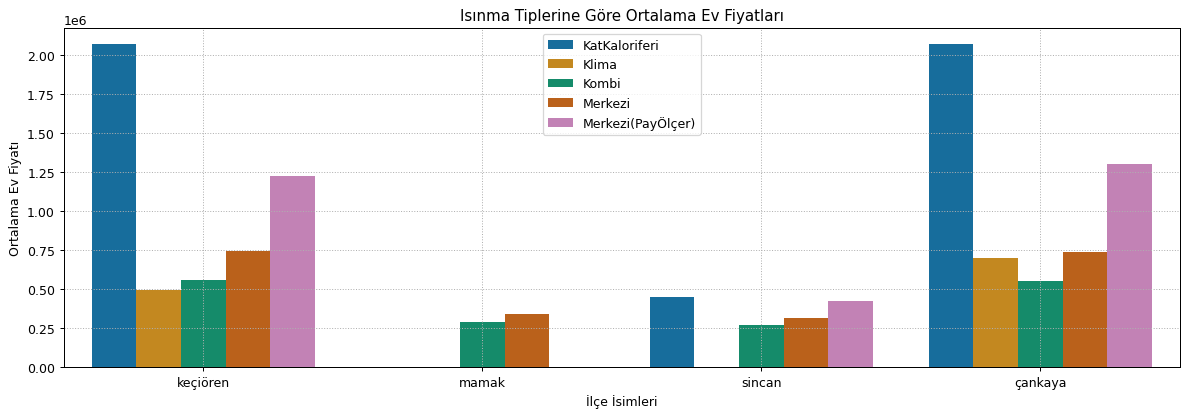

In [27]:
fig, ax = plt.subplots(figsize=(16,5), dpi=90)
sns.set_palette("colorblind", 5)
sns.barplot(x="ilce", y="mean_fiyat", hue="isinma_tipi", data=isinma_df.reset_index(), ax=ax)
ax.legend(loc="upper center")
ax.grid(linestyle="dotted")
ax.set_xlabel("İlçe İsimleri")
ax.set_ylabel("Ortalama Ev Fiyatı")
ax.set_title("Isınma Tiplerine Göre Ortalama Ev Fiyatları")
plt.show()